In [1]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Gaussian import Gaussian_compute_tradeoff_curve
from analysis.tradeoff_Laplace import Laplace_compute_tradeoff_curve

from mech.GaussianDist import *

In [2]:
#logging.basicConfig(
  #  level=logging.INFO,
   # format="%(asctime)s %(message)s",
    #handlers=[
     #   logging.FileHandler("/../log/tradeoff-kNN-Gaussian.log")
   # logging.StreamHandler()
  # ]
#)


kwargs = generate_params(num_train_samples = 100000, num_test_samples = 100000)
estimator = GaussianDistEstimator(kwargs)

In [3]:
eta_values = np.linspace(0.01, 5, 500)
alpha_values_thm, beta_values_thm = Gaussian_compute_tradeoff_curve(eta_values)

In [4]:
eta_values.shape

(500,)

In [4]:
output = estimator.build(eta = eta_values, nworkers=50)

In [5]:
alpha_values_estimate = output["alpha"]

beta_values_estimate = output["beta"]

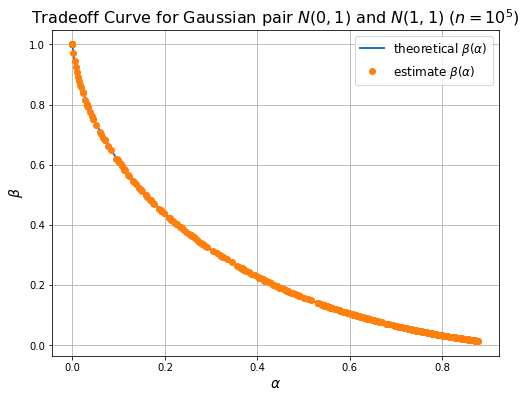

In [6]:
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(alpha_values_thm, beta_values_thm, label=r"theoretical $\beta(\alpha)$", linewidth=2)
plt.plot(alpha_values_estimate, beta_values_estimate, label=r"estimate $\beta(\alpha)$", linestyle='none', marker='o', linewidth=2)
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14)
plt.title(r"Tradeoff Curve for Gaussian pair $N(0,1)$ and $N(1, 1)$ ($n=10^5$)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(os.getcwd()+"/../fig/tradeoff_Gaussian_105.png", bbox_inches = 'tight', dpi = 300);
plt.show()

In [7]:
beta_values_estimate

array([1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       0.97053, 0.94529, 0.92565, 0.90739, 0.89265, 0.87844, 0.86586,
       0.85876, 0.83843, 0.84075, 0.81595, 0.79667, 0.80092, 0.79222,
       0.77561, 0.76224, 0.75334, 0.75196, 0.7334 , 0.70994, 0.70364,
       0.69069, 0.68258, 0.68117, 0.66273, 0.65006, 0.62036, 0.62106,
       0.61617, 0.6136 , 0.60997, 0.60179, 0.59585, 0.5877 , 0.58691,
       0.58403, 0.58198, 0.56745, 0.56316, 0.54258, 0.53479, 0.54605,
       0.52366, 0.52105, 0.51584, 0.51516, 0.51364, 0.49913, 0.49939,
       0.49367, 0.48328, 0.4822 , 0.47453, 0.46962, 0.45349, 0.44788,
       0.44909, 0.4385 , 0.42402, 0.42183, 0.41798, 0.41247, 0.40742,
       0.40404, 0.40319, 0.39181, 0.3945 , 0.38707, 0.38552, 0.37795,
       0.37119, 0.3667 , 0.36594, 0.36301, 0.36298, 0.35863, 0.35614,
       0.35127, 0.34504, 0.3416 , 0.33839, 0.33673, 0.33078, 0.32798,
       0.31436, 0.30